In [19]:
import pickle
import numpy as np
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from KB_evolution_utils import X_train, X_test, Y_train, Y_test, X_bow, all_models_score_table, logmodel, custom_tokens_bow, inverse_document_frequency, term_frequency, accuracy_score

In [3]:
def predicted_sentiment_ratio(y_test, predictions):
    positive_percent = np.count_nonzero(predictions==1)*100//len(predictions)
    negative_percent = np.count_nonzero(predictions==0)*100//len(predictions)
    # print(f"Y_test: pos/neg percentage ~ {np.count_nonzero(y_test==1)*100//len(y_test)}, {np.count_nonzero(y_test==0)*100//len(y_test)}")
    return positive_percent, negative_percent

In [4]:
def test_accuracy(selected_genes):
    st = time.time()

    # to be corrected   
    logmodel.fit(X_train[:, selected_genes], Y_train)
    
    et = time.time()

    predictions = logmodel.predict(X_test[:, selected_genes])
    ratio = predicted_sentiment_ratio(Y_test, predictions)
    return accuracy_score(Y_test, predictions), et-st, ratio

In [13]:
def get_avg_scores(result_set):
    avg_acc = np.array(result_set[0][1])
    for i in result_set[1:]:
        avg_acc += i[1]
    avg_acc = avg_acc / len(result_set)
    return avg_acc

In [5]:
def get_intersection_genes(result_set):
    size_of_chromo = None
    common_indexes = {}
    best_chromo_in_each_run = []
    for res in result_set:
        best_chromo = res[0][-1]   
        size_of_chromo = len(best_chromo)
        chromo_features = np.where(best_chromo != 0)[0]
        best_chromo_in_each_run.append([best_chromo, chromo_features.shape[0], res[1][-1]])

        for index in chromo_features:
            common_indexes[index] = common_indexes.setdefault(index, 0) + 1
            
    sorted_common_indexes = np.array(sorted(common_indexes.items(), key=lambda x: x[1], reverse=True))
    
    return sorted_common_indexes, best_chromo_in_each_run

In [20]:
def accuracy_plot(scores_set):
    for score in scores_set:
        plt.plot(score)
    plt.xlabel('No. of Generations')
    plt.ylabel('Accuracy')
    plt.show()
    

# Collect Common indexes from res of n run evolution


# Final Results

In [7]:
def tabulate_results(chromo_set):
    print('Actual chromosome length in X_Test: ', X_bow.shape[1])
    print('\nRandomForest with full length -', all_models_score_table.iloc[0, 1:], "\n")
    # print('Total Common genes count ~(-1): ', top_i_common_indexes)

    accuracy = []
    features_count = []
    time_to_train = []
    sentiment_ratio = []

    sorted_common_indexes, best_chromo_in_each_run = get_intersection_genes(chromo_set)
    common_indexes_count = sorted_common_indexes[:, 1]
    # print("Total common indexes:", sorted_common_indexes.shape[0])

    count_thresholds = list(set(common_indexes_count))[::-1]
    print("Intersection frequency:", count_thresholds, "\n")

    for i in count_thresholds:
        selected_features  = sorted_common_indexes[np.where(sorted_common_indexes[:, 1] >= i), 0][0]
        features_count.append(len(selected_features))
        acc, ttt, sr = test_accuracy(selected_features)
        accuracy.append(acc)
        time_to_train.append(ttt)
        sentiment_ratio.append(sr)

    
    table_data = {'Count Threshold': count_thresholds,
                'Feature count': features_count,
                'Accuracy': accuracy,
                'Time Taken to Train': time_to_train,
                'Sentiment Ratio(p/n)': sentiment_ratio
                }
    print(tabulate(table_data, headers='keys', tablefmt="simple_grid"))
    return table_data, best_chromo_in_each_run


In [26]:
with open('../pickles/kbga/n_run_az_kbga_nokbps.pkl', 'rb') as rf:
    n_az_kbga_nokbps = pickle.load(rf)
    n_az_kbga_nokbps_table, best_chromos_nokbga = tabulate_results(n_az_kbga_nokbps)
    n_az_kbga_nokbps_table

Actual chromosome length in X_Test:  1553

RandomForest with full length - Accuracy               0.8
Exec_Time_secs    1.667083
Name: 0, dtype: object 

Intersection frequency: [5, 4, 3, 2, 1] 

┌───────────────────┬─────────────────┬────────────┬───────────────────────┬────────────────────────┐
│   Count Threshold │   Feature count │   Accuracy │   Time Taken to Train │ Sentiment Ratio(p/n)   │
├───────────────────┼─────────────────┼────────────┼───────────────────────┼────────────────────────┤
│                 5 │              10 │      0.744 │              0.379056 │ (33, 66)               │
├───────────────────┼─────────────────┼────────────┼───────────────────────┼────────────────────────┤
│                 4 │              17 │      0.82  │              0.307678 │ (43, 56)               │
├───────────────────┼─────────────────┼────────────┼───────────────────────┼────────────────────────┤
│                 3 │              25 │      0.832 │              0.459297 │ (46, 54)     

In [31]:
avg_nokbps = get_avg_scores(n_az_kbga_nokbps)

In [30]:
with open('../pickles/kbga/n_run_az_kbga_cmp.pkl', 'rb') as rf:
    n_az_kbga_cmp = pickle.load(rf)
    n_az_kbga_cmp_table, best_chromos_cmp = tabulate_results(n_az_kbga_cmp)
    n_az_kbga_cmp_table

Actual chromosome length in X_Test:  1553

RandomForest with full length - Accuracy               0.8
Exec_Time_secs    1.667083
Name: 0, dtype: object 

Intersection frequency: [5, 4, 3, 2, 1] 

┌───────────────────┬─────────────────┬────────────┬───────────────────────┬────────────────────────┐
│   Count Threshold │   Feature count │   Accuracy │   Time Taken to Train │ Sentiment Ratio(p/n)   │
├───────────────────┼─────────────────┼────────────┼───────────────────────┼────────────────────────┤
│                 5 │               6 │      0.696 │              0.331094 │ (26, 73)               │
├───────────────────┼─────────────────┼────────────┼───────────────────────┼────────────────────────┤
│                 4 │               9 │      0.728 │              0.29771  │ (30, 70)               │
├───────────────────┼─────────────────┼────────────┼───────────────────────┼────────────────────────┤
│                 3 │              23 │      0.816 │              0.361034 │ (43, 56)     

In [32]:
avg_cmp = get_avg_scores(n_az_kbga_cmp)

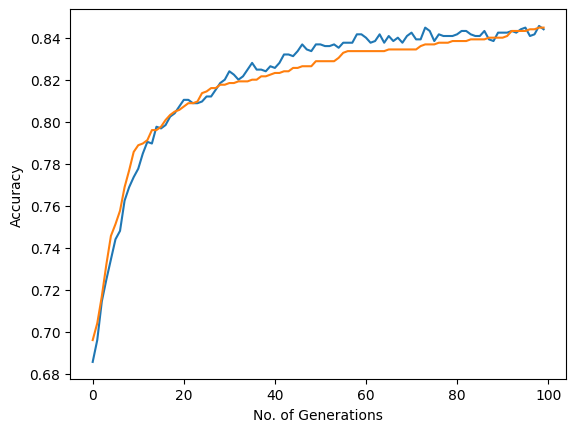

In [33]:
accuracy_plot([avg_nokbps, avg_cmp])

In [162]:
with open('pickles/kbga/amazon/n_run_az_kb_ip.pkl', 'rb') as rf:
    n_kb_ip = pickle.load(rf)
    n_run_kb_ip_table, best_chromos_ip = tabulate_results(n_kb_ip)
    n_run_kb_ip_table

Actual chromosome length in X_Test:  1566

RandomForest with full length - Accuracy             0.808
Exec_Time_secs    0.372023
Name: 0, dtype: object 

Intersection frequency: [30, 29, 28, 27, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1] 

┌───────────────────┬─────────────────┬────────────┬───────────────────────┬────────────────────────┐
│   Count Threshold │   Feature count │   Accuracy │   Time Taken to Train │ Sentiment Ratio(p/n)   │
├───────────────────┼─────────────────┼────────────┼───────────────────────┼────────────────────────┤
│                30 │               2 │      0.484 │              0.455779 │ (0, 100)               │
├───────────────────┼─────────────────┼────────────┼───────────────────────┼────────────────────────┤
│                29 │               4 │      0.484 │              0.42187  │ (0, 100)               │
├───────────────────┼─────────────────┼────────────┼───────────────────────┼────────────────────────┤
│             

In [163]:
with open('pickles/kbga/amazon/n_run_az_kb_ps.pkl', 'rb') as rf:
    n_kb_ps = pickle.load(rf)
    n_run_kb_ps_table, best_chromos_ps = tabulate_results(n_kb_ps)
    n_run_kb_ps_table

Actual chromosome length in X_Test:  1566

RandomForest with full length - Accuracy             0.808
Exec_Time_secs    0.372023
Name: 0, dtype: object 

Intersection frequency: [8, 7, 6, 5, 4, 3, 2, 1] 

┌───────────────────┬─────────────────┬────────────┬───────────────────────┬────────────────────────┐
│   Count Threshold │   Feature count │   Accuracy │   Time Taken to Train │ Sentiment Ratio(p/n)   │
├───────────────────┼─────────────────┼────────────┼───────────────────────┼────────────────────────┤
│                 8 │               6 │      0.476 │              0.51564  │ (0, 99)                │
├───────────────────┼─────────────────┼────────────┼───────────────────────┼────────────────────────┤
│                 7 │              13 │      0.472 │              0.398932 │ (1, 98)                │
├───────────────────┼─────────────────┼────────────┼───────────────────────┼────────────────────────┤
│                 6 │              39 │      0.544 │              0.421872 │ (94,

In [169]:
with open('pickles/kbga/amazon/n_run_az_kbga.pkl', 'rb') as rf:
    n_kbga = pickle.load(rf)
    n_run_kbga_table, best_chromos_kbga = tabulate_results(n_kbga)
    n_run_kbga_table

Actual chromosome length in X_Test:  1566

RandomForest with full length - Accuracy             0.808
Exec_Time_secs    0.372023
Name: 0, dtype: object 

Intersection frequency: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1] 

┌───────────────────┬─────────────────┬────────────┬───────────────────────┬────────────────────────┐
│   Count Threshold │   Feature count │   Accuracy │   Time Taken to Train │ Sentiment Ratio(p/n)   │
├───────────────────┼─────────────────┼────────────┼───────────────────────┼────────────────────────┤
│                10 │               2 │      0.484 │              0.4109   │ (0, 100)               │
├───────────────────┼─────────────────┼────────────┼───────────────────────┼────────────────────────┤
│                 9 │               7 │      0.484 │              0.390954 │ (0, 100)               │
├───────────────────┼─────────────────┼────────────┼───────────────────────┼────────────────────────┤
│                 8 │              16 │      0.536 │              0.319143